# [CDAF] Atividade 1

## Nome
Nome: Rodrigo Felipe Lima Braz


## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão, trabalhando em cima do dataset do Soccer Prediction Challenge, disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie um histograma para a quantidade de gols marcados por jogo do time da casa, do time fora, de gols totais e da diferença de gols por partida.
- Caso hajam instâncias com valores nitidamente errados, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média de cada um dos 4 histogramas solicitados acima.

In [1]:
#Carregar dataset
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path_training = r"C:\Users\rodri\Desktop\Atividades\Ciencia_de_dados_futebol\atv1\TrainingSet_2023_02_08.xlsx"
dataset = pd.read_excel(path_training)


In [2]:
#Tratar dados nítidamente errados, ou seja, HS ou AS negativos, visto que, não existe gols marcados negativos

dataset.drop(dataset[dataset['HS'] < 0].index, inplace= True)
dataset.drop(dataset[dataset['AS'] < 0].index, inplace= True)

In [3]:
dataset.head(15)

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L
5,00-01,GER1,12/08/2000,Leverkusen,Wolfsburg,2,0,2,W
6,00-01,GER1,12/08/2000,Werder Bremen,Energie Cottbus,3,1,2,W
7,00-01,GER1,13/08/2000,Eintracht Frankfurt,Unterhaching,3,0,3,W
8,00-01,GER1,13/08/2000,Schalke 04,FC Koln,2,1,1,W
9,00-01,GER1,18/08/2000,Energie Cottbus,Dortmund,1,4,-3,L


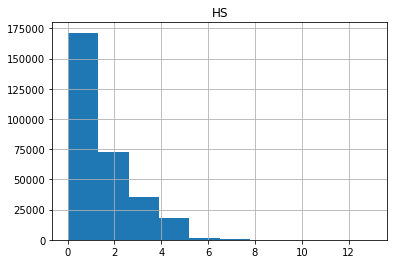

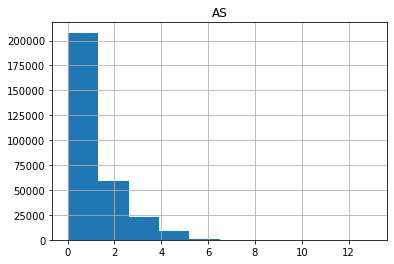

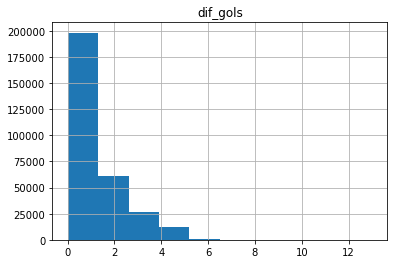

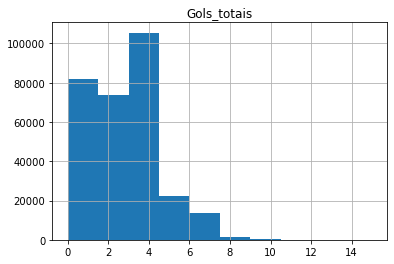

In [4]:
#Criar os 4 histogramas
histograma_ht = dataset.hist(column = 'HS')
plt.show(histograma_ht)

histograma_at = dataset.hist(column='AS')
plt.show(histograma_at)

#Eu entendo que não existe diferença de gols negativa, logo apliquei fórmula do valor absoluto...
dataset['dif_gols'] = dataset['GD'].map(lambda x: abs(x))
histograma_dif_gols = dataset.hist(column='dif_gols')
plt.show(histograma_dif_gols)

dataset['Gols_totais'] = dataset['HS'] + dataset['AS']
histograma_gols_totais = dataset.hist(column= 'Gols_totais')
plt.show(histograma_gols_totais)


In [5]:
#Calcular min, max e média dos histogramas

ht_min = dataset['HS'].min()
ht_max = dataset['HS'].max()
ht_media =dataset['HS'].mean()
print(f'Do histograma de gols em casa, temos mínimo: {ht_min}, máximo: {ht_max} e média: {ht_media}')

at_min = dataset['AS'].min()
at_max = dataset['AS'].max()
at_media =dataset['AS'].mean()
print(f'Do histograma de gols fora de casa, temos mínimo: {at_min}, máximo: {at_max} e média: {at_media}')

dif_gols_min = dataset['dif_gols'].min()
dif_gols_max = dataset['dif_gols'].max()
dif_gols_media =dataset['dif_gols'].mean()
print(f'Do histograma de diferença de gols, temos mínimo: {dif_gols_min}, máximo: {dif_gols_max} e média: {dif_gols_media}')

gols_totais_min = dataset['Gols_totais'].min()
gols_totais_max = dataset['Gols_totais'].max()
gols_totais_media =dataset['Gols_totais'].mean()
print(f'Do histograma de gols totais, temos mínimo: {gols_totais_min}, máximo: {gols_totais_max} e média: {gols_totais_media}')

Do histograma de gols em casa, temos mínimo: 0, máximo: 13 e média: 1.471700194179949
Do histograma de gols fora de casa, temos mínimo: 0, máximo: 13 e média: 1.1214410090673013
Do histograma de diferença de gols, temos mínimo: 0, máximo: 13 e média: 1.2660332144635653
Do histograma de gols totais, temos mínimo: 0, máximo: 15 e média: 2.5931412032472503


## Questão 2
- Escolha uma temporada que já terminou, de alguma das ligas presentes no dataset.
- Realize os mesmos histogramas da questão 1, mas agora para a temporada escolhida.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre a qualidade ofensiva da liga escolhida vs. o todo?

In [6]:
#Temporada escolhida: 18-19 Liga: Premier league
filt1 = dataset['Sea'] == '18-19' 
filt2 = dataset['Lge'] == 'ENG1'

filt = filt1  &  filt2

dataset_premier = dataset[filt]

dataset_premier.head(5)

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,dif_gols,Gols_totais
220164,18-19,ENG1,10/08/2018,Manchester United,Leicester City,2,1,1,W,1,3
220165,18-19,ENG1,11/08/2018,Newcastle United,Tottenham Hotspur,1,2,-1,L,1,3
220166,18-19,ENG1,11/08/2018,Bournemouth,Cardiff City,2,0,2,W,2,2
220167,18-19,ENG1,11/08/2018,Fulham,Crystal Palace,0,2,-2,L,2,2
220168,18-19,ENG1,11/08/2018,Huddersfield Town,Chelsea,0,3,-3,L,3,3


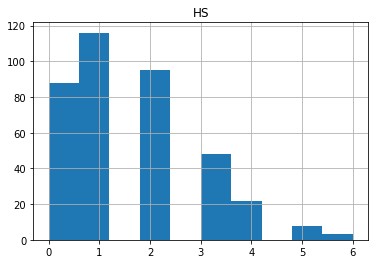

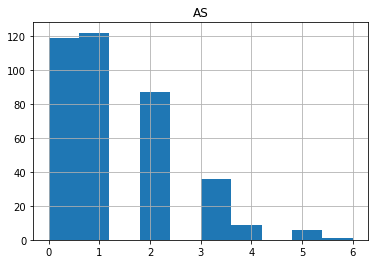

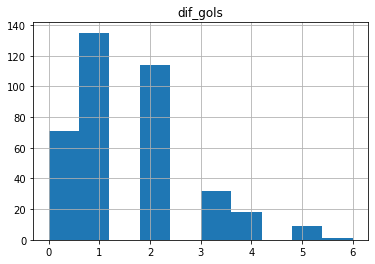

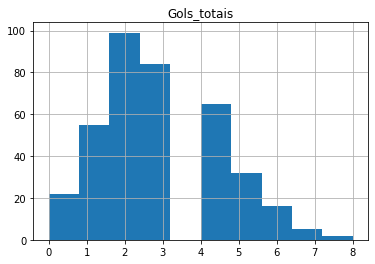

In [7]:
#Criar os 4 histogramas
histograma_ht_premier = dataset_premier.hist(column = 'HS')
plt.show(histograma_ht_premier)

histograma_at_premier = dataset_premier.hist(column='AS')
plt.show(histograma_at_premier)

histograma_dif_gols_premier = dataset_premier.hist(column='dif_gols')
plt.show(histograma_dif_gols_premier)

histograma_gols_totais_premier = dataset_premier.hist(column= 'Gols_totais')
plt.show(histograma_gols_totais_premier)

In [8]:
#Calcular min, max e média dos histogramas

ht_min_premier = dataset_premier['HS'].min()
ht_max_premier = dataset_premier['HS'].max()
ht_media_premier =dataset_premier['HS'].mean()
print(f'Do histograma de gols em casa da premier league, temos mínimo: {ht_min_premier}, máximo: {ht_max_premier} e média: {ht_media_premier}')

at_min_premier = dataset_premier['AS'].min()
at_max_premier = dataset_premier['AS'].max()
at_media_premier =dataset_premier['AS'].mean()
print(f'Do histograma de gols fora de casa da premier league, temos mínimo: {at_min_premier}, máximo: {at_max_premier} e média: {at_media_premier}')

dif_gols_min_premier = dataset_premier['dif_gols'].min()
dif_gols_max_premier = dataset_premier['dif_gols'].max()
dif_gols_media_premier =dataset_premier['dif_gols'].mean()
print(f'Do histograma de diferença de gols da premier league, temos mínimo: {dif_gols_min_premier}, máximo: {dif_gols_max_premier} e média: {dif_gols_media_premier}')

gols_totais_min_premier = dataset_premier['Gols_totais'].min()
gols_totais_max_premier = dataset_premier['Gols_totais'].max()
gols_totais_media_premier =dataset_premier['Gols_totais'].mean()
print(f'Do histograma de gols totais da premier league, temos mínimo: {gols_totais_min_premier}, máximo: {gols_totais_max_premier} e média: {gols_totais_media_premier}')

Do histograma de gols em casa da premier league, temos mínimo: 0, máximo: 6 e média: 1.568421052631579
Do histograma de gols fora de casa da premier league, temos mínimo: 0, máximo: 6 e média: 1.2526315789473683
Do histograma de diferença de gols da premier league, temos mínimo: 0, máximo: 6 e média: 1.5315789473684212
Do histograma de gols totais da premier league, temos mínimo: 0, máximo: 8 e média: 2.8210526315789473


Resposta: 
Logo, podemos dizer que as comparações feitas indicam que a Premier League de 18-19 teve-se uma qualidade ofensiva maior, se comparado ao todo, pois em todas as médias
relacionadas a gols, as médias da temporada isolada é maior se comparando ao todo.


## Questão 3
- À partir dos dados do campeonato em selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordena a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo para apenas para a primeira metade de jogos.

In [9]:
import numpy as np

times = dataset_premier['HT'].unique().tolist()
#tabela primeira metade:

df_tabela_1half = pd.DataFrame(columns=['nome_time', 'pontos', 'jogos', 'V', 'E', 'D', 'GP', 'GC', 'SG'])

data_comp = np.datetime64('2018-12-27')

dataset_premier2 = dataset_premier
dataset_premier2['Date'] = pd.to_datetime(dataset_premier2['Date'], infer_datetime_format=True)
filt_date = dataset_premier2['Date'] <= data_comp

dataset_1half = dataset_premier2[filt_date]

for time in times:
    
    vitorias = 0
    empates = 0
    derrotas = 0

    dado_time_1half = []
    dado_time_1half.append(time)
    
    filt  = dataset_1half['HT'] == time
    filt2 = dataset_1half['AT'] == time
    
    data_ida = dataset_1half[filt]
    data_volta = dataset_1half[filt2]
    
    jogos_ida = data_ida['GD'].values
    jogos_volta = data_volta['GD'].values

    for saldo_ida in jogos_ida:
        if saldo_ida > 0:
            vitorias +=1
        elif saldo_ida == 0:
            empates +=1
        elif saldo_ida < 0:
            derrotas +=1 
    
    for saldo_volta in jogos_volta:
        if saldo_volta < 0:
            vitorias +=1
        elif saldo_volta == 0:
            empates+=1
        elif saldo_volta > 0:
            derrotas+= 1

   
    pontos = (vitorias * 3) + (empates)
    dado_time_1half.append(pontos)

    jogos = vitorias + empates + derrotas
    dado_time_1half.append(jogos)

    dado_time_1half.append(vitorias)
    dado_time_1half.append(empates)
    dado_time_1half.append(derrotas)



    gols_pro = data_ida['HS'].sum() + data_volta['AS'].sum()
    dado_time_1half.append(gols_pro)

    gols_contra = data_ida['AS'].sum() + data_volta['HS'].sum()
    dado_time_1half.append(gols_contra)

    saldo_gols = gols_pro - gols_contra
    dado_time_1half.append(saldo_gols)

    df_tabela_1half.loc[len(df_tabela_1half)] = dado_time_1half

df_tabela_1half.sort_values(by = ['pontos'], inplace = True, ignore_index= True, ascending=False)

#Tabela completa:
df_tabela = pd.DataFrame(columns=['nome_time', 'pontos', 'jogos', 'V', 'E', 'D', 'GP', 'GC', 'SG'])
for time in times:
    
    vitorias = 0
    empates = 0
    derrotas = 0

    dado_time = []
    dado_time.append(time)
    
    filt  = dataset_premier['HT'] == time
    filt2 = dataset_premier['AT'] == time
    
    data_ida = dataset_premier[filt]
    data_volta = dataset_premier[filt2]
    
    jogos_ida = data_ida['GD'].values
    jogos_volta = data_volta['GD'].values

    for saldo_ida in jogos_ida:
        if saldo_ida > 0:
            vitorias +=1
        elif saldo_ida == 0:
            empates +=1
        elif saldo_ida < 0:
            derrotas +=1 
    
    for saldo_volta in jogos_volta:
        if saldo_volta < 0:
            vitorias +=1
        elif saldo_volta == 0:
            empates+=1
        elif saldo_volta > 0:
            derrotas+= 1

   
    pontos = (vitorias * 3) + (empates)
    dado_time.append(pontos)

    jogos = vitorias + empates + derrotas
    dado_time.append(jogos)

    dado_time.append(vitorias)
    dado_time.append(empates)
    dado_time.append(derrotas)



    gols_pro = data_ida['HS'].sum() + data_volta['AS'].sum()
    dado_time.append(gols_pro)

    gols_contra = data_ida['AS'].sum() + data_volta['HS'].sum()
    dado_time.append(gols_contra)

    saldo_gols = gols_pro - gols_contra
    dado_time.append(saldo_gols)

    df_tabela.loc[len(df_tabela)] = dado_time

df_tabela.sort_values(by = ['pontos'], inplace = True, ignore_index= True, ascending=False)

print(df_tabela_1half)
print(df_tabela)

d:\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
d:\python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/08/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache

            nome_time  pontos  jogos   V  E   D  GP  GC  SG
0           Liverpool      51     19  16  3   0  43   7  36
1   Tottenham Hotspur      45     19  15  0   4  42  18  24
2     Manchester City      44     19  14  2   3  51  15  36
3             Chelsea      40     19  12  4   3  37  16  21
4             Arsenal      38     19  11  5   3  41  25  16
5   Manchester United      32     19   9  5   5  37  31   6
6      Leicester City      28     19   8  4   7  24  22   2
7             Watford      27     19   8  3   8  26  27  -1
8     West Ham United      27     19   8  3   8  27  28  -1
9             Everton      27     19   7  6   6  31  29   2
10        Bournemouth      26     19   8  2   9  27  33  -6
11      Wolverhampton      26     19   7  5   7  20  22  -2
12           Brighton      22     19   6  4   9  21  27  -6
13     Crystal Palace      19     19   5  4  10  17  25  -8
14   Newcastle United      17     19   4  5  10  14  26 -12
15        Southampton      15     19   3

C:\Users\rodri\AppData\Local\Temp\ipykernel_16852\85888486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_premier2['Date'] = pd.to_datetime(dataset_premier2['Date'], infer_datetime_format=True)


In [10]:
dataset_premier


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,dif_gols,Gols_totais
220164,18-19,ENG1,2018-10-08,Manchester United,Leicester City,2,1,1,W,1,3
220165,18-19,ENG1,2018-11-08,Newcastle United,Tottenham Hotspur,1,2,-1,L,1,3
220166,18-19,ENG1,2018-11-08,Bournemouth,Cardiff City,2,0,2,W,2,2
220167,18-19,ENG1,2018-11-08,Fulham,Crystal Palace,0,2,-2,L,2,2
220168,18-19,ENG1,2018-11-08,Huddersfield Town,Chelsea,0,3,-3,L,3,3
220169,18-19,ENG1,2018-11-08,Watford,Brighton,2,0,2,W,2,2
220170,18-19,ENG1,2018-11-08,Wolverhampton,Everton,2,2,0,D,0,4
220171,18-19,ENG1,2018-12-08,Southampton,Burnley,0,0,0,D,0,0
220172,18-19,ENG1,2018-12-08,Liverpool,West Ham United,4,0,4,W,4,4
220173,18-19,ENG1,2018-12-08,Arsenal,Manchester City,0,2,-2,L,2,2


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um histograma com a probabilidade de diferentes placares entre os times.

In [11]:
#Peguei bem baseado do que estava no site, e adaptei pra temporada 18-19 da premier

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam


dataset_premier
dataset_premier_poisson = dataset_premier[['HT' ,'AT', 'HS', 'AS']]
dataset_premier_poisson.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam', 'HS': 'HomeGoals', 'AS': 'AwayGoals'}, inplace= True)

goal_model_data = pd.concat([dataset_premier_poisson[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           dataset_premier_poisson[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()
poisson_model.summary()


C:\Users\rodri\AppData\Local\Temp\ipykernel_16852\2528468375.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_premier_poisson.rename(columns={'HT': 'HomeTeam', 'AT': 'AwayTeam', 'HS': 'HomeGoals', 'AS': 'AwayGoals'}, inplace= True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.1
Date:                Tue, 11 Apr 2023   Deviance:                       762.55
Time:                        23:36:51   Pearson chi2:                     656.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2448
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.5061      0.188      2.685      0.007       0.137       0.876
team[T.Bournemouth]              -0.2470      0.178     -1.388      0.165      -0.596       0.102
team[T.Brighton]                 -0.7283      0.206     -3.538      0.000      -1.132      -0.325
team[T.Burnley]                  -0.4684      0.190     -2.468      0.014      -0.841      -0.096
team[T.Cardiff City]             -0.7485      0.208     -3.600      0.000      -1.156      -0.341
team[T.Chelsea]                  -0.1597      0.172     -0.927      0.354      -0.497       0.178
team[T.Crystal Palace]           -0.3578      0.183     -1.957      0.050      -0.716       0.000
team[T.Everton]                  -0.3074      0.180     -1.710      0.087      -0.660       0.045
team[T.Fulham]                   -0.7366      0.208     -3.542      0.000      -1.144      -0.329
team[T.Huddersfield Town]        -1.1778      0.243     -4.837      0.000      -1.655      -0.701
team[T.Leicester City]           -0.3627      0.183     -1.984      0.047      -0.721      -0.004
team[T.Liverpool]                 0.1698      0.158      1.074      0.283      -0.140       0.480
team[T.Manchester City]           0.2362      0.156      1.515      0.130      -0.069       0.542
team[T.Manchester United]        -0.1135      0.171     -0.664      0.507      -0.448       0.221
team[T.Newcastle United]         -0.5573      0.194     -2.874      0.004      -0.937      -0.177
team[T.Southampton]              -0.4714      0.190     -2.483      0.013      -0.843      -0.099
team[T.Tottenham Hotspur]        -0.0980      0.169     -0.578      0.563      -0.430       0.234
team[T.Watford]                  -0.3324      0.182     -1.829      0.067      -0.689       0.024
team[T.West Ham United]          -0.3363      0.182     -1.850      0.064      -0.693       0.020
team[T.Wolverhampton]            -0.4465      0.187     -2.384      0.017      -0.814      -0.079
opponent[T.Bournemouth]           0.3008      0.184      1.631      0.103      -0.061       0.662
opponent[T.Brighton]              0.1253      0.191      0.657      0.511      -0.249       0.499
opponent[T.Burnley]               0.2607      0.186      1.405      0.160      -0.103       0.624
opponent[T.Cardiff City]          0.2644      0.185      1.430      0.153      -0.098       0.627
opponent[T.Chelsea]              -0.2790      0.213     -1.310      0.190      -0.697       0.139
opponent[T.Crystal Palace]        0.0167      0.196      0.085      0.932      -0.368       0.402
opponent[T.Everton]              -0.1224      0.204     -0.601      0.548      -0.522       0.277
opponent[T.Fulham]                0.4252      0.179      2.374      0.018       0.074       0.776
opponent[T.Huddersfield Town]     0.3495     

In [12]:
#Simular a Partida entre primeiro e o quarto colocado, city 1 em casa, 4 Tottenham Hotspur fora de casa
home_team='Manchester City'
away_team='Tottenham Hotspur'

#Predição da partida
home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))
print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

#Mostrar o resultado
home_goals=np.random.poisson(home_score_rate)
away_goals=np.random.poisson(away_score_rate)
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Manchester City against Tottenham Hotspur expect to score: 1    1.99771
dtype: float64
Tottenham Hotspur against Manchester City expect to score: 1    0.691755
dtype: float64
Manchester City: 3
Tottenham Hotspur: 0


Output recebido:

Manchester City against Tottenham Hotspur expect to score: 1    1.99771
dtype: float64
Tottenham Hotspur against Manchester City expect to score: 1    0.691755
dtype: float64
Manchester City: 1
Tottenham Hotspur: 4

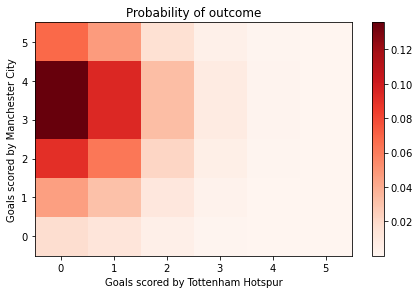

In [13]:
#Grafico
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(poisson_model, home_team, away_team,max_goals)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

#Home, draw, away probabilities
homewin=np.sum(np.tril(score_matrix, -1))
draw=np.sum(np.diag(score_matrix))
awaywin=np.sum(np.triu(score_matrix, 1))

## Questão 5
- Utilize o modelo treinado para simular os placares esperados de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 é um empate.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? O que isso pode indicar em termos de o que modelo subestima e superestima sobre a qualidade dos times?

In [14]:
def preditar_partida(poisson_model , home_team, away_team):
    retorno = []
    #Predição da partida
    home_score_rate=poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                        'home':1},index=[1]))
    away_score_rate=poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                        'home':0},index=[1]))
    #Mostrar o resultado
    home_goals=np.random.poisson(home_score_rate)
    away_goals=np.random.poisson(away_score_rate)

    retorno.insert(0, away_goals[0])
    retorno.insert(0, home_goals[0])

    return retorno

In [24]:

tabela_pred = dataset_premier_poisson[['HomeTeam' , 'AwayTeam']]
tabela_pred.reset_index(inplace= True)

home_goals = []
away_goals = []
wdl = []

for idx , row in enumerate(tabela_pred.iterrows()):
    result = preditar_partida(poisson_model, tabela_pred.iloc[idx , 1], tabela_pred.iloc[idx , 2])
    home_goals.append(result[0])
    away_goals.append(result[1])
    
    if result[0] == result[1]:
        wdl.append('D')

    elif result[0] < result[1]:
        wdl.append('L')
    
    elif result[0] > result[1]:
        wdl.append('W')

tabela_pred['HomeGoals'] = home_goals
tabela_pred['AwayGoals'] = away_goals
tabela_pred['SG'] = tabela_pred['HomeGoals'] - tabela_pred['AwayGoals']
tabela_pred['WDL'] = wdl

#Tabela pred é a previsão da tabela pelo modelo, vamos montar a classificação a partir dela agora...
tabela_pred.head(5)

,index,HomeTeam,AwayTeam,HomeGoals,AwayGoals,SG,WDL
0,220164,Manchester United,Leicester City,1,1,0,D
1,220165,Newcastle United,Tottenham Hotspur,0,1,-1,L
2,220166,Bournemouth,Cardiff City,1,1,0,D
3,220167,Fulham,Crystal Palace,0,2,-2,L
4,220168,Huddersfield Town,Chelsea,0,1,-1,L


In [22]:
#Tabela completa:


times = tabela_pred['HomeTeam'].unique().tolist()

df_tabela_pred = pd.DataFrame(columns=['nome_time', 'pontos', 'jogos', 'V', 'E', 'D', 'GP', 'GC', 'SG'])

for time in times:
    
    vitorias = 0
    empates = 0
    derrotas = 0

    dado_time = []
    dado_time.append(time)
    
    filt  = tabela_pred['HomeTeam'] == time
    filt2 = tabela_pred['AwayTeam'] == time
    
    data_ida = tabela_pred[filt]
    data_volta = tabela_pred[filt2]
    
    jogos_ida = data_ida['SG'].values
    jogos_volta = data_volta['SG'].values

    for saldo_ida in jogos_ida:
        if saldo_ida > 0:
            vitorias +=1
        elif saldo_ida == 0:
            empates +=1
        elif saldo_ida < 0:
            derrotas +=1 
    
    for saldo_volta in jogos_volta:
        if saldo_volta < 0:
            vitorias +=1
        elif saldo_volta == 0:
            empates+=1
        elif saldo_volta > 0:
            derrotas+= 1

   
    pontos = (vitorias * 3) + (empates)
    dado_time.append(pontos)

    jogos = vitorias + empates + derrotas
    dado_time.append(jogos)

    dado_time.append(vitorias)
    dado_time.append(empates)
    dado_time.append(derrotas)



    gols_pro = data_ida['HomeGoals'].sum() + data_volta['AwayGoals'].sum()
    dado_time.append(gols_pro)

    gols_contra = data_ida['AwayGoals'].sum() + data_volta['HomeGoals'].sum()
    dado_time.append(gols_contra)

    saldo_gols = gols_pro - gols_contra
    dado_time.append(saldo_gols)

    df_tabela_pred.loc[len(df_tabela_pred)] = dado_time

df_tabela_pred.sort_values(by = ['pontos'], inplace = True, ignore_index= True, ascending=False)
df_tabela_pred

,nome_time,pontos,jogos,V,E,D,GP,GC,SG
0,Manchester City,92,38,28,8,2,91,20,71
1,Liverpool,82,38,25,7,6,90,23,67
2,Chelsea,78,38,24,6,8,69,34,35
3,Tottenham Hotspur,74,38,21,11,6,73,34,39
4,Arsenal,61,38,17,10,11,77,58,19
5,Manchester United,60,38,17,9,12,59,55,4
6,Everton,59,38,17,8,13,61,46,15
7,Wolverhampton,55,38,15,10,13,53,41,12
8,West Ham United,54,38,15,9,14,58,47,11
9,Bournemouth,53,38,15,8,15,63,72,-9


In [23]:
#Logo, construimos uma tabela de acordo com a simulação
df_tabela_pred

,nome_time,pontos,jogos,V,E,D,GP,GC,SG
0,Manchester City,92,38,28,8,2,91,20,71
1,Liverpool,82,38,25,7,6,90,23,67
2,Chelsea,78,38,24,6,8,69,34,35
3,Tottenham Hotspur,74,38,21,11,6,73,34,39
4,Arsenal,61,38,17,10,11,77,58,19
5,Manchester United,60,38,17,9,12,59,55,4
6,Everton,59,38,17,8,13,61,46,15
7,Wolverhampton,55,38,15,10,13,53,41,12
8,West Ham United,54,38,15,9,14,58,47,11
9,Bournemouth,53,38,15,8,15,63,72,-9


ESSA FOI A TABELA CRIADA, NA ULTIMA VEZ QUE EXECUTEI O MODELO E AS PREDIÇÕES, FAREI AS OBSERVAÇÕES ABAIXO


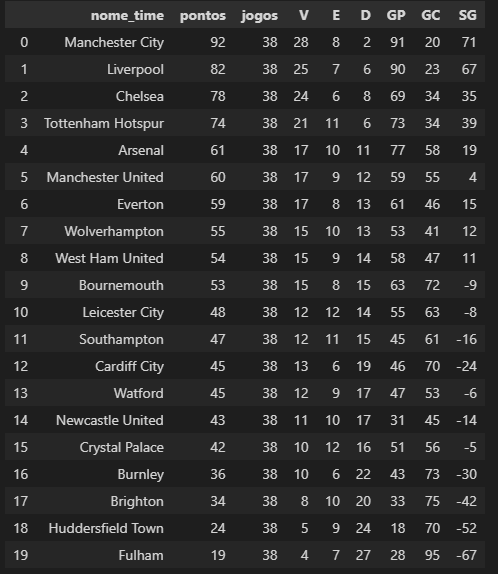

Podemos notar, que o modelo acertou a ordem dos 6 primeiros colocados, entretanto ele prêve no geral mais derrotas desses 6 primeiros colocados do que aconteceu na vida real. Ou seja, mesmo acertando essa ordem ele de certa forma subestimou os melhores times. Além disso, os piores times no geral tem mais vitórias na simulação do que na tabela real, o que indica que podem ter sido superestimados.
